In [11]:
import pandas as pd

data = pd.read_csv("../csv/autos.csv")

data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [21]:
# Mutual Information : Any realition between feature and target
# MI Score : 0 (no relation between feat and target) , max upto 2, rare case may be even bigget
X = data.copy()
y = X.pop("price")

# X_test = data.copy()
# X_test = X_test.drop(["price"], axis=1)
# X_test.head()
# print(X.dtypes)
obj_count = X.select_dtypes(["object"])
obj_count.columns # 8 - 'make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       #'engine_location', 'engine_type', 'fuel_system']
int_count = X.select_dtypes(["int"])
int_count.columns # 10   - ['symboling', 'num_of_doors', 'curb_weight', 'num_of_cylinders',
       #'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm',
       # 'city_mpg', 'highway_mpg']
float_count = X.select_dtypes(["float"])
float_count.columns # 6  - ['wheel_base', 'length', 'width', 'height', 'bore', 'stroke']

Index(['wheel_base', 'length', 'width', 'height', 'bore', 'stroke'], dtype='object')

In [42]:
# Label encoding for categoricals
s = []
for colname in X.select_dtypes("object"):
    X[colname],s = X[colname].factorize()
    


In [39]:
discrete_features = X.dtypes == int


In [43]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [57]:
from sklearn.feature_selection import mutual_info_regression

def calc_mi_score(X,y,discrete_features):
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = calc_mi_score(X, y, discrete_features)

mi_scores  # show a few features with their MI scores

    

curb_weight          1.573946
horsepower           1.251580
engine_size          0.997837
highway_mpg          0.949800
city_mpg             0.858553
width                0.684274
length               0.613288
wheel_base           0.585280
make                 0.543817
bore                 0.489014
fuel_system          0.481266
peak_rpm             0.449953
height               0.376628
stroke               0.376040
drive_wheels         0.333127
num_of_cylinders     0.330589
symboling            0.229062
engine_type          0.151239
compression_ratio    0.133853
aspiration           0.087755
body_style           0.079818
fuel_type            0.048120
engine_location      0.035905
num_of_doors         0.010938
Name: MI Scores, dtype: float64

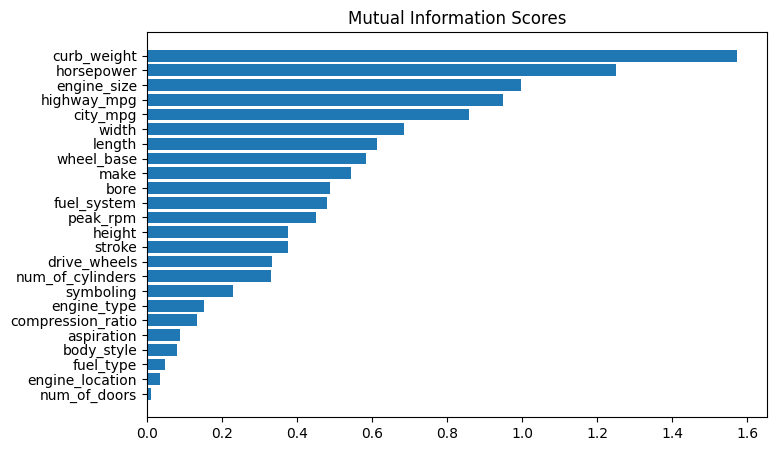

In [77]:
import matplotlib.pyplot as plt
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [69]:
mi_scores.index

Index(['curb_weight', 'horsepower', 'engine_size', 'highway_mpg', 'city_mpg',
       'width', 'length', 'wheel_base', 'make', 'bore', 'fuel_system',
       'peak_rpm', 'height', 'stroke', 'drive_wheels', 'num_of_cylinders',
       'symboling', 'engine_type', 'compression_ratio', 'aspiration',
       'body_style', 'fuel_type', 'engine_location', 'num_of_doors'],
      dtype='object')

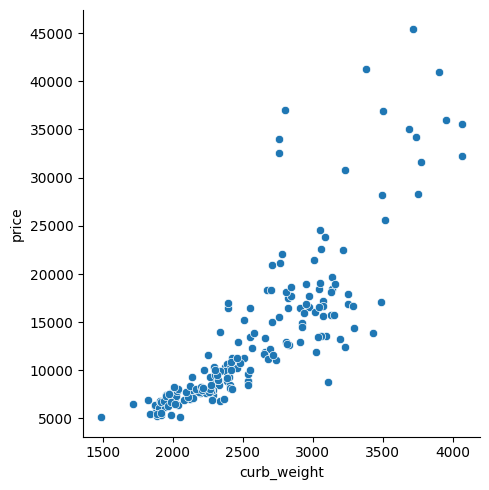

In [83]:
import seaborn as sns
sns.relplot(x="curb_weight", y="price", data=data);


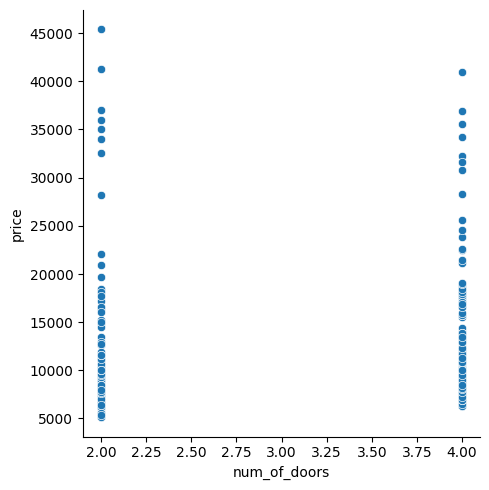

In [85]:
sns.relplot(x="num_of_doors", y="price", data=data)


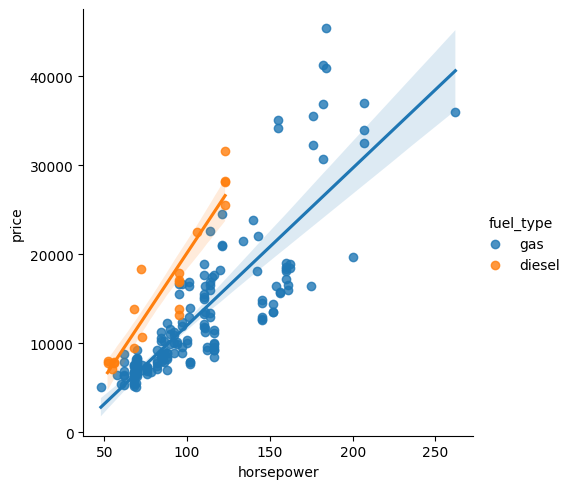

In [86]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=data);
